In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



 **Linear Regression**

In [17]:
df=pd.read_csv("/content/dataset.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [18]:
df.isna()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [19]:
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [20]:
X = df[['Distance_km', 'Preparation_Time_min']].values
y = df['Delivery_Time_min'].values.reshape(-1, 1)

In [21]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [22]:

m = len(y)
X_b = np.c_[np.ones((m, 1)), X]

In [23]:

theta = np.zeros((3, 1))
alpha = 0.01
epochs = 1000

In [25]:
#Cost Function (Mean Square Error)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [26]:
#Gradient descent
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []  # Store cost values for plotting

    for epoch in range(epochs):
        predictions = X.dot(theta)  # Compute hypothesis
        errors = predictions - y  # Compute errors
        gradients = (1 / m) * X.T.dot(errors)  # Compute gradients
        theta -= alpha * gradients  # Update theta

        cost = compute_cost(X, y, theta)  # Compute cost after update
        cost_history.append(cost)  # Store cost

        # Print cost every 100 iterations
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, cost_history

In [27]:
theta_optimal, cost_history = gradient_descent(X_b, y, theta, alpha, epochs)

Epoch 0: Cost = 1817.1437736417768
Epoch 100: Cost = 305.1054689670287
Epoch 200: Cost = 102.27501575209077
Epoch 300: Cost = 75.06573833755054
Epoch 400: Cost = 71.41555678798889
Epoch 500: Cost = 70.92586179385184
Epoch 600: Cost = 70.86016400689329
Epoch 700: Cost = 70.85134966623089
Epoch 800: Cost = 70.85016705206304
Epoch 900: Cost = 70.85000837629022


In [29]:
print("Optimized Theta Values:", theta_optimal.flatten())

Optimized Theta Values: [56.72955081 17.29063234  6.9359901 ]


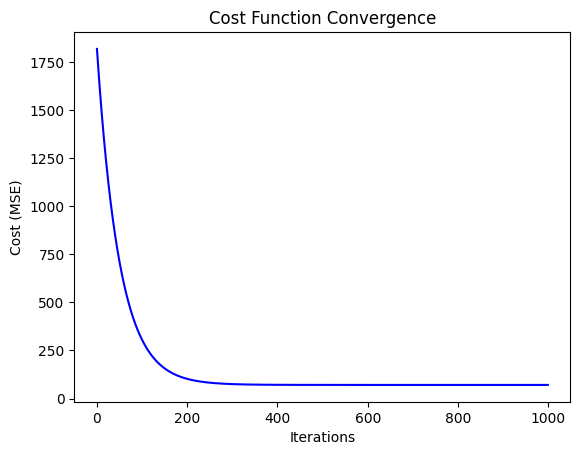

In [30]:
plt.plot(range(epochs), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

**Multi Linear Regression**

In [2]:
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
y = 4 + 3 * X1 + 2 * X2 + np.random.randn(100, 1)

In [3]:
X1,X2

(array([[0.74908024],
        [1.90142861],
        [1.46398788],
        [1.19731697],
        [0.31203728],
        [0.31198904],
        [0.11616722],
        [1.73235229],
        [1.20223002],
        [1.41614516],
        [0.04116899],
        [1.9398197 ],
        [1.66488528],
        [0.42467822],
        [0.36364993],
        [0.36680902],
        [0.60848449],
        [1.04951286],
        [0.86389004],
        [0.58245828],
        [1.22370579],
        [0.27898772],
        [0.5842893 ],
        [0.73272369],
        [0.91213997],
        [1.57035192],
        [0.39934756],
        [1.02846888],
        [1.18482914],
        [0.09290083],
        [1.2150897 ],
        [0.34104825],
        [0.13010319],
        [1.89777107],
        [1.93126407],
        [1.6167947 ],
        [0.60922754],
        [0.19534423],
        [1.36846605],
        [0.88030499],
        [0.24407647],
        [0.99035382],
        [0.06877704],
        [1.8186408 ],
        [0.51755996],
        [1

In [4]:
X_b = np.c_[np.ones((100, 1)), X1, X2]

In [5]:
# Cost function for multiple linear regression
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [6]:
def gradient_descent(X, y, theta, learning_rate=0.1, iterations=1000):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [7]:
theta = np.random.randn(3, 1)

In [8]:
learning_rate = 0.1
iterations = 1000
theta_best, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

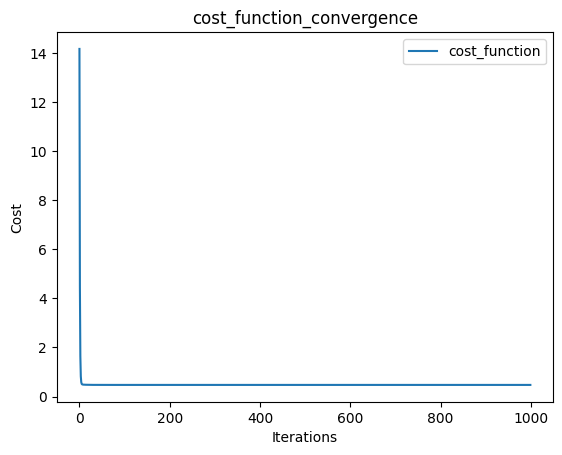

In [11]:
plt.plot(range(iterations), cost_history, label='cost_function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('cost_function_convergence')
plt.legend()
plt.show()


In [12]:
print("Optimal Theta Values:")
print(theta_best)

Optimal Theta Values:
[[3.91061096]
 [2.82913688]
 [2.23977021]]
